### Bayesian data analysis
##  Chapter 9, demo 1

Prof Gelman has a jar of coins. He promises that if the students
guess how many coins there are, they will get all the coins in
the jar. Students discuss and guess different values. Based on these
they eventually present their uncertainty about the number of coins as
a normal distribution N(160,40). What value they should guess?

In [1]:
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os, sys
# add utilities directory to path
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

In [3]:
# edit default plot settings
plt.rc('font', size=12)

In [4]:
# distribution
m = 160     # mean
s = 40      # std

x = np.arange(m-3*s, m+3*s+1)
px = stats.norm.pdf(x, loc=m, scale=s)
xpx = x * px

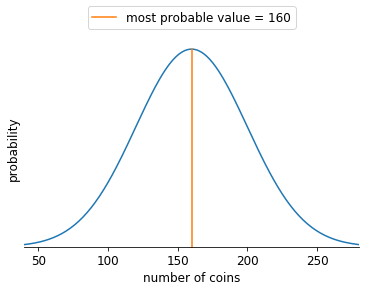

In [5]:
plt.plot(x, px)
plot_tools.modify_axes.only_x(plt.gca())
plt.xlim([x[0], x[-1]])
plt.ylabel('probability')
plt.xlabel('number of coins')

# If students just want to guess right, and they do not care how much money
# they'll get they should guess the most probable value.
h2, = plt.plot([m, m], [0, stats.norm.pdf(m, loc=m, scale=s)])
plt.legend(
    (h2,),
    ('most probable value = {}'.format(m),),
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02)
);

In [6]:
# apply gray background style
plt.style.use(plot_tools.custom_styles['gray_background'])

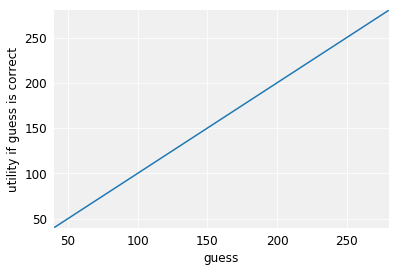

In [7]:
# Alternatively students might want to maximize the exepected utility of the
# number coins. Assume that utility of the money is linear.
# Plot the utility
plt.plot(x, x)
plt.ylabel('utility if guess is correct')
plt.xlabel('guess')
plt.xlim([x[0], x[-1]])
plt.ylim([x[0], x[-1]]);

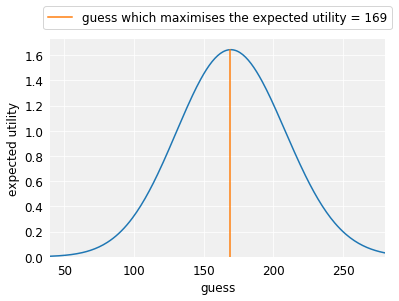

In [8]:
# If students guess value a, given their estimate of the uncertainity,
# probability that they get a coins is p(a), and expected utility is a*p(a).
# Plot the expected utility 
plt.plot(x, xpx)
plt.ylabel('expected utility')
plt.xlabel('guess')
plt.ylim([0, plt.ylim()[1]])
plt.xlim([x[0], x[-1]])

# Compute the maximum of the expected utility
mi = np.argmax(xpx)
meu = xpx[mi]
meux = x[mi]
h3, = plt.plot([meux, meux], [0, meu])
plt.legend(
    (h3,),
    ('guess which maximises the expected utility = {}'.format(meux),),
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02)
);